In [1]:
#!python -m spacy download es_core_news_sm
#!python -m spacy_spanish_lemmatizer download wiki

In [1]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from resources.text_dataset_analytics import TextDatasetAnalyzer
from resources.text_pattern_analytics import TextPatternAnalyzer
from resources.utils import preprocess_dataframe


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Jesus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Jesus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jesus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
path_files = [
    "../data/data_extracted_topic_1_13022025_new.json",
    "../data/data_extracted_topic_2_14022025_new.json",
    "../data/data_extracted_topic_3_14022025_new.json",
    "../data/data_extracted_topic_4_14022025_new.json",
    "../data/data_extracted_topic_5_14022025_new.json",
    "../data/data_extracted_topic_6_14022025_new.json",
    "../data/data_extracted_topic_7_14022025_new.json",
    "../data/data_extracted_topic_8_14022025_new.json",
    "../data/data_extracted_topic_9_14022025_new.json",
    "../data/data_extracted_topic_10_14022025_new.json"
]

In [5]:
df_list = []
for path in path_files:
    try:
        df = pd.read_json(path, encoding="utf-8") 
        df_list.append(df) 
    except Exception as e:
        print(f"Error reading {path}: {e}")

df_concat = pd.concat(df_list, ignore_index=True)
df_concat.head()

,query,direct_snippet,url,full_title,full_content
0,¿Qué nivel de aprobación tiene actualmente la ...,"febrero 10, 2025; 8:03 pm; El 94 por ciento de...",https://americaeconomica.com/noticia/peru/el-9...,El 94% de los peruanos desaprueba la gestión d...,«¿Aprueba o desaprueba la labor que viene desa...
1,¿Qué nivel de aprobación tiene actualmente la ...,La aprobación ciudadana a la gestión de la pre...,https://americaeconomica.com/noticia/peru/la-a...,La aprobación de la presidenta de Perú toca su...,«¿Aprueba o desaprueba la labor que viene desa...
2,¿Qué nivel de aprobación tiene actualmente la ...,"Lima, 9 feb (Prensa Latina) La presidenta peru...",https://www.prensa-latina.cu/2025/02/09/presid...,Presidenta de Perú mantiene desaprobación casi...,El sondeo mensual de la empresa Datum registra...
3,¿Qué nivel de aprobación tiene actualmente la ...,Nombre del año 2025 en Perú: ¿cuál es la propu...,https://larepublica.pe/sociedad/2024/12/02/nom...,[Error] Web request failed: 403 Client Error: ...,"El gobernador regional de La Libertad, César A..."
4,¿Qué nivel de aprobación tiene actualmente la ...,La aprobación de la presidenta Dina Boluarte d...,https://www.americatv.com.pe/noticias/actualid...,Ipsos-América: Presidenta Dina Boluarte mantie...,"En ese sentido, también se reveló que el nivel..."


# CLEANING AND PROCESSING DATA

In [6]:
df_processed = preprocess_dataframe(df_concat, 'full_content')
df_processed

,query,direct_snippet,url,full_title,full_content,combined_text,cleaned_text,tokens,no_stopwords,stemmed,lemmatized,final_text
0,¿Qué nivel de aprobación tiene actualmente la ...,"febrero 10, 2025; 8:03 pm; El 94 por ciento de...",https://americaeconomica.com/noticia/peru/el-9...,El 94% de los peruanos desaprueba la gestión d...,«¿Aprueba o desaprueba la labor que viene desa...,"febrero 10, 2025; 8:03 pm; El 94 por ciento de...",febrero pm el por ciento de peruanos desaprueb...,"[febrero, pm, el, por, ciento, de, peruanos, d...","[febrero, pm, ciento, peruanos, desaprueba, ge...","[febrer, pm, cient, peruan, desaprueb, gestion...","[febrer, pm, cient, peruan, desaprueb, gestion...",febrer pm cient peruan desaprueb gestion presi...
1,¿Qué nivel de aprobación tiene actualmente la ...,La aprobación ciudadana a la gestión de la pre...,https://americaeconomica.com/noticia/peru/la-a...,La aprobación de la presidenta de Perú toca su...,«¿Aprueba o desaprueba la labor que viene desa...,La aprobación ciudadana a la gestión de la pre...,la aprobación ciudadana a la gestión de la pre...,"[la, aprobación, ciudadana, a, la, gestión, de...","[aprobación, ciudadana, gestión, presidenta, p...","[aprob, ciudadan, gestion, president, peru, di...","[aprob, ciudadar, gestion, president, peru, di...",aprob ciudadar gestion president peru din bolu...
2,¿Qué nivel de aprobación tiene actualmente la ...,"Lima, 9 feb (Prensa Latina) La presidenta peru...",https://www.prensa-latina.cu/2025/02/09/presid...,Presidenta de Perú mantiene desaprobación casi...,El sondeo mensual de la empresa Datum registra...,"Lima, 9 feb (Prensa Latina) La presidenta peru...",lima feb prensa latina la presidenta peruana c...,"[lima, feb, prensa, latina, la, presidenta, pe...","[lima, feb, prensa, latina, presidenta, peruan...","[lim, feb, prens, latin, president, peruan, ca...","[lim, feb, prens, latin, president, peruan, ca...",lim feb prens latin president peruan cay cient...
3,¿Qué nivel de aprobación tiene actualmente la ...,Nombre del año 2025 en Perú: ¿cuál es la propu...,https://larepublica.pe/sociedad/2024/12/02/nom...,[Error] Web request failed: 403 Client Error: ...,"El gobernador regional de La Libertad, César A...",Nombre del año 2025 en Perú: ¿cuál es la propu...,nombre del año en perú cuál es la propuesta de...,"[nombre, del, año, en, perú, cuál, es, la, pro...","[nombre, año, perú, cuál, propuesta, denominac...","[nombr, año, peru, cual, propuest, denomin, fa...","[nombr, año, peru, cual, propuest, denomin, fa...",nombr año peru cual propuest denomin falt ofic...
4,¿Qué nivel de aprobación tiene actualmente la ...,La aprobación de la presidenta Dina Boluarte d...,https://www.americatv.com.pe/noticias/actualid...,Ipsos-América: Presidenta Dina Boluarte mantie...,"En ese sentido, también se reveló que el nivel...",La aprobación de la presidenta Dina Boluarte d...,la aprobación de la presidenta dina boluarte d...,"[la, aprobación, de, la, presidenta, dina, bol...","[aprobación, presidenta, dina, boluarte, desce...","[aprob, president, din, boluart, descend, punt...","[aprob, president, din, boluart, descend, punt...",aprob president din boluart descend punt alcan...
...,...,...,...,...,...,...,...,...,...,...,...,...
7203,¿Qué reacciones han tenido los sectores social...,Se ha escrito mucho sobre las causas y consecu...,https://parlamericas.org/uploads/documents/PA9...,Title not found,,Se ha escrito mucho sobre las causas y consecu...,se ha escrito mucho sobre las causas y consecu...,"[se, ha, escrito, mucho, sobre, las, causas, y...","[escrito, causas, consecuencias, económicas, c...","[escrit, caus, consecuent, econom, crisis, fin...","[escrit, caus, consecuent, econom, crisis, fin...",escrit caus consecuent econom crisis financ in...
7204,¿Qué reacciones han tenido los sectores social...,El feminismo también ha tenido un impacto econ...,https://gea.lat/feminismo-y-sociedad-impacto-y...,Feminismo y sociedad: impacto y transformación,El feminismo es un movimien

# DATASET ANALYZER

In [7]:
analyzer = TextDatasetAnalyzer(
    df_processed, 
    text_column="final_text"
)
analyzer.run_full_analysis()


--- General Information ---
Total number of examples: 7208

Main characteristics:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7208 entries, 0 to 7207
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   query           7208 non-null   object
 1   direct_snippet  7208 non-null   object
 2   url             7208 non-null   object
 3   full_title      7208 non-null   object
 4   full_content    7208 non-null   object
 5   combined_text   7208 non-null   object
 6   cleaned_text    7208 non-null   object
 7   tokens          7208 non-null   object
 8   no_stopwords    7208 non-null   object
 9   stemmed         7208 non-null   object
 10  lemmatized      7208 non-null   object
 11  final_text      7208 non-null   object
dtypes: object(12)
memory usage: 675.9+ KB
None

Average number of words per example: 897.15

Vocabulary size: 67955

Most frequent words:
polit: 71435
econom: 49127
social: 37877
part: 33619
pu

# FINDING PATTERNS 

In [8]:
text_column = "final_text" 

analyzer = TextPatternAnalyzer(df_processed, text_column)
df_analyzed = analyzer.run_full_analysis()


Extracting Named Entities...

Extracting POS Tags...

Performing Sentiment Analysis with TextBlob...

Performing Sentiment Analysis with VADER...

Analysis Completed!


In [9]:
df_analyzed

,query,direct_snippet,url,full_title,full_content,combined_text,cleaned_text,tokens,no_stopwords,stemmed,lemmatized,final_text,word_count,named_entities,pos_tags,sentiment_TextBlob,sentiment_label_TextBlob,sentiment_VADER,sentiment_label_VADER
0,¿Qué nivel de aprobación tiene actualmente la ...,"febrero 10, 2025; 8:03 pm; El 94 por ciento de...",https://americaeconomica.com/noticia/peru/el-9...,El 94% de los peruanos desaprueba la gestión d...,«¿Aprueba o desaprueba la labor que viene desa...,"febrero 10, 2025; 8:03 pm; El 94 por ciento de...",febrero pm el por ciento de peruanos desaprueb...,"[febrero, pm, el, por, ciento, de, peruanos, d...","[febrero, pm, ciento, peruanos, desaprueba, ge...","[febrer, pm, cient, peruan, desaprueb, gestion...","[febrer, pm, cient, peruan, desaprueb, gestion...",febrer pm cient peruan desaprueb gestion presi...,137,"[(juan jos, PER), (asum carter, PER), (cient o...","[(febrer, VERB), (pm, ADP), (cient, PROPN), (p...",0.000000,neutral,0.5423,positive
1,¿Qué nivel de aprobación tiene actualmente la ...,La aprobación ciudadana a la gestión de la pre...,https://americaeconomica.com/noticia/peru/la-a...,La aprobación de la presidenta de Perú toca su...,«¿Aprueba o desaprueba la labor que viene desa...,La aprobación ciudadana a la gestión de la pre...,la aprobación ciudadana a la gestión de la pre...,"[la, aprobación, ciudadana, a, la, gestión, de...","[aprobación, ciudadana, gestión, presidenta, p...","[aprob, ciudadan, gestion, president, peru, di...","[aprob, ciudadar, gestion, president, peru, di...",aprob ciudadar gestion president peru din bolu...,127,"[(aprob, MISC), (cient mostr lun, MISC), (soci...","[(aprob, VERB), (ciudadar, VERB), (gestion, PR...",0.000000,neutral,-0.4019,negative
2,¿Qué nivel de aprobación tiene actualmente la ...,"Lima, 9 feb (Prensa Latina) La presidenta peru...",https://www.prensa-latina.cu/2025/02/09/presid...,Presidenta de Perú mantiene desaprobación casi...,El sondeo mensual de la empresa Datum registra...,"Lima, 9 feb (Prensa Latina) La presidenta peru...",lima feb prensa latina la presidenta peruana c...,"[lima, feb, prensa, latina, la, presidenta, pe...","[lima, feb, prensa, latina, presidenta, peruan...","[lim, feb, prens, latin, president, peruan, ca...","[lim, feb, prens, latin, president, peruan, ca...",lim feb prens latin president peruan cay cient...,217,"[(lim, PER), (critic gobiern, MISC), (mund, LO...","[(lim, VERB), (feb, PROPN), (prens, PROPN), (l...",-0.091667,negative,-0.4404,negative
3,¿Qué nivel de aprobación tiene actualmente la ...,Nombre del año 2025 en Perú: ¿cuál es la propu...,https://larepublica.pe/sociedad/2024/12/02/nom...,[Error] Web request failed: 403 Client Error: ...,"El gobernador regional de La Libertad, César A...",Nombre del año 2025 en Perú: ¿cuál es la propu...,nombre del año en perú cuál es la propuesta de...,"[nombre, del, año, en, perú, cuál, es, la, pro...","[nombre, año, perú, cuál, propuesta, denominac...","[nombr, año, peru, cual, propuest, denomin, fa...","[nombr, año, peru, cual, propuest, denomin, fa...",nombr año peru cual propuest denomin falt ofic...,321,"[(nombr, LOC), (año, MISC), (acuñ resalt aprob...","[(nombr, NOUN), (año, NOUN), (peru, VERB), (cu...",0.000000,neutral,-0.6249,negative
4,¿Qué nivel de aprobación tiene actualmente la ...,La aprobación de la presidenta Dina Boluarte d...,https://www.americatv.com.pe/noticias/actualid...,Ipsos-América: Presidenta Dina Boluarte mantie...,"En ese sentido, también se reveló que el nivel...",La aprobación de la presidenta Dina Boluarte d...,la aprobación de la presidenta dina boluarte d...,"[la, aprobación, de, la, presidenta, dina, bol...","[aprobación, presidenta, dina, boluarte, desce...","[aprob, president, din, boluart, descend, punt...","[aprob, president, din, boluart, descend, punt...",aprob president din boluart descend punt alcan...,40,"[(aprob, MISC), (encuest, ORG), (rechaz gestio...","[(aprob, VERB), (president, ADJ), (din, PROPN)...",0.000000,neutral,0

In [10]:
df_analyzed[['final_text', 'named_entities', 'pos_tags', 'sentiment_TextBlob', 'sentiment_label_TextBlob', 'sentiment_VADER', 'sentiment_label_VADER']].head(20)

,final_text,named_entities,pos_tags,sentiment_TextBlob,sentiment_label_TextBlob,sentiment_VADER,sentiment_label_VADER
0,febrer pm cient peruan desaprueb gestion presi...,"[(juan jos, PER), (asum carter, PER), (cient o...","[(febrer, VERB), (pm, ADP), (cient, PROPN), (p...",0.000000,neutral,0.5423,positive
1,aprob ciudadar gestion president peru din bolu...,"[(aprob, MISC), (cient mostr lun, MISC), (soci...","[(aprob, VERB), (ciudadar, VERB), (gestion, PR...",0.000000,neutral,-0.4019,negative
2,lim feb prens latin president peruan cay cient...,"[(lim, PER), (critic gobiern, MISC), (mund, LO...","[(lim, VERB), (feb, PROPN), (prens, PROPN), (l...",-0.091667,negative,-0.4404,negative
3,nombr año peru cual propuest denomin falt ofic...,"[(nombr, LOC), (año, MISC), (acuñ resalt aprob...","[(nombr, NOUN), (año, NOUN), (peru, VERB), (cu...",0.000000,neutral,-0.6249,negative
4,aprob president din boluart descend punt alcan...,"[(aprob, MISC), (encuest, ORG), (rechaz gestio...","[(aprob, VERB), (president, ADJ), (din, PROPN)...",0.000000,neutral,0.0000,neutral
5,desaprob president peru din boluart alcanz niv...,"[(lun, MISC), (desaprueb boluart, PER), (muj g...","[(desaprob, VERB), (president, NOUN), (peru, V...",-0.066667,negative,-0.8271,negative
6,president prefer dej ser lider pais sig baj m...,"[(president prefer, ORG), (cambi, MISC), (gabi...","[(president, VERB), (prefer, NOUN), (dej, PROP...",-0.400000,negative,-0.5267,negative
7,president claudi sheinbaum cuent aprob tras pr...,"[(president claudi, PER), (calific desempeñ bu...","[(president, NOUN), (claudi, ADJ), (sheinbaum,...",0.000000,neutral,-0.7351,negative
8,nuev cad entrevist institut estudi peruan deci...,"[(nuev, PER), (respald aprob, PER), (conviert ...","[(nuev, PROPN), (cad, PROPN), (entrevist, PROP...",0.000000,neutral,0.0000,neutral
9,president din boluart enfrent grav crisis apro...,"[(president din boluart enfrent, PER), (republ...","[(president, VERB), (din, ADP), (boluart, NOUN...",0.118590,positive,-0.6249,negative


## Análisis de Sentimientos con TextBlob

C:\Users\Jesus\AppData\Local\Temp\ipykernel_22124\3682451650.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


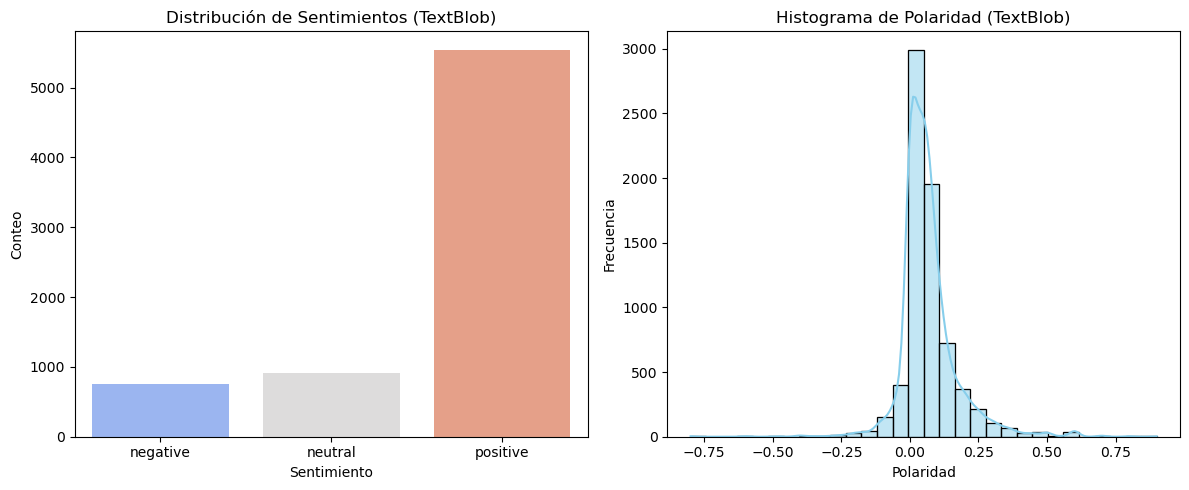

In [11]:
plt.figure(figsize=(12, 5))

# Gráfico de barras
plt.subplot(1, 2, 1)
sns.countplot(
    data=df_analyzed, 
    x="sentiment_label_TextBlob", 
    order=["negative", "neutral", "positive"], 
    palette="coolwarm"
)
plt.title("Distribución de Sentimientos (TextBlob)")
plt.xlabel("Sentimiento")
plt.ylabel("Conteo")

# Histograma
plt.subplot(1, 2, 2)
sns.histplot(
    df_analyzed["sentiment_TextBlob"], 
    bins=30, 
    kde=True, 
    color="skyblue"
)
plt.title("Histograma de Polaridad (TextBlob)")
plt.xlabel("Polaridad")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

## Análisis de Sentimientos con VADER

C:\Users\Jesus\AppData\Local\Temp\ipykernel_22124\545255971.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


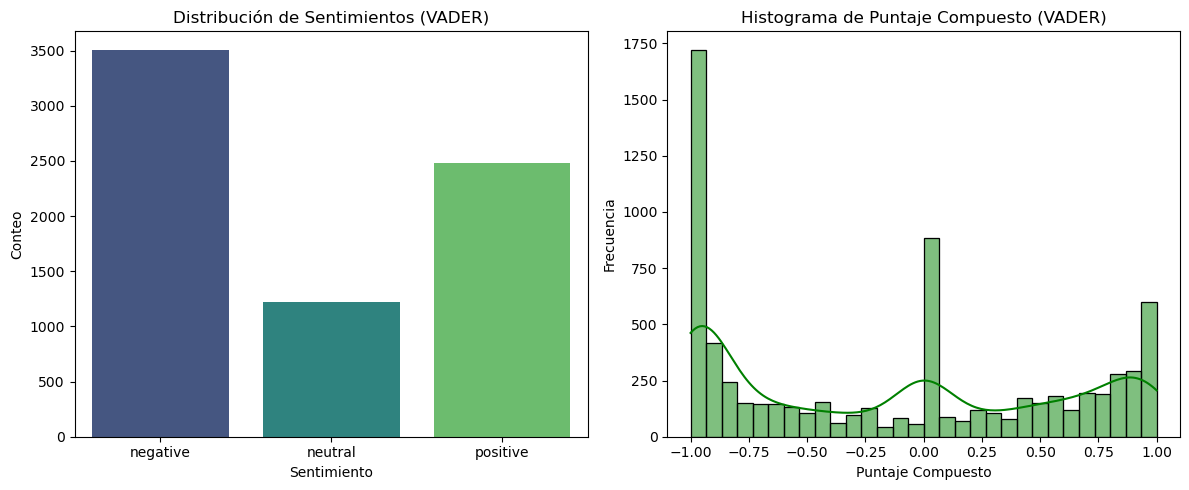

In [12]:
plt.figure(figsize=(12, 5))

# Gráfico de barras: distribución de etiquetas de sentimiento (VADER)
plt.subplot(1, 2, 1)
sns.countplot(
    data=df_analyzed, 
    x="sentiment_label_VADER", 
    order=["negative", "neutral", "positive"], 
    palette="viridis"
)
plt.title("Distribución de Sentimientos (VADER)")
plt.xlabel("Sentimiento")
plt.ylabel("Conteo")

# Histograma: distribución del puntaje compuesto (VADER)
plt.subplot(1, 2, 2)
sns.histplot(
    df_analyzed["sentiment_VADER"], 
    bins=30, 
    kde=True, 
    color="green"
)
plt.title("Histograma de Puntaje Compuesto (VADER)")
plt.xlabel("Puntaje Compuesto")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()


## Extracción POS Tagging

Conteo de Etiquetas POS:
Counter({'PROPN': 3233581, 'ADJ': 1045759, 'VERB': 918505, 'NOUN': 870548, 'ADV': 104462, 'ADP': 68279, 'AUX': 55452, 'NUM': 52592, 'DET': 49661, 'PRON': 24834, 'SCONJ': 21363, 'CCONJ': 18796, 'SPACE': 17917, 'SYM': 1438, 'INTJ': 850, 'PUNCT': 360, 'PART': 149, 'X': 10})


C:\Users\Jesus\AppData\Local\Temp\ipykernel_22124\2313866227.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


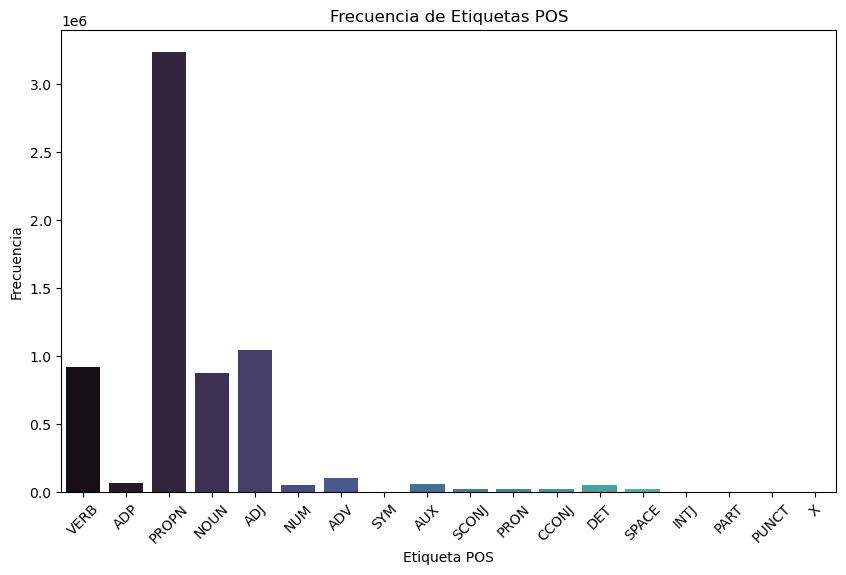

In [ ]:

# Aplanar la lista de POS tags de todos los ejemplos
all_pos = []
for pos_list in df_analyzed["pos_tags"]:
    for token, pos in pos_list:
        all_pos.append(pos)

pos_counts = Counter(all_pos)
print("Conteo de Etiquetas POS:")
print(pos_counts)

# Visualización: gráfico de barras de las etiquetas POS
plt.figure(figsize=(10, 6))
sns.barplot(
    x=list(pos_counts.keys()), 
    y=list(pos_counts.values()), 
    palette="mako"
)
plt.title("Frecuencia de Etiquetas POS")
plt.xlabel("Etiqueta POS")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.show()

## Extracción de Named Entities (NER)

Top 10 Entidades Nombradas:
cambi: 6792
eeuu: 2128
tom: 1929
brasil: 1875
tod: 1634
busc: 1421
basic: 1335
clav: 1177
medi: 1153
dia: 1110


C:\Users\Jesus\AppData\Local\Temp\ipykernel_22124\3388034344.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


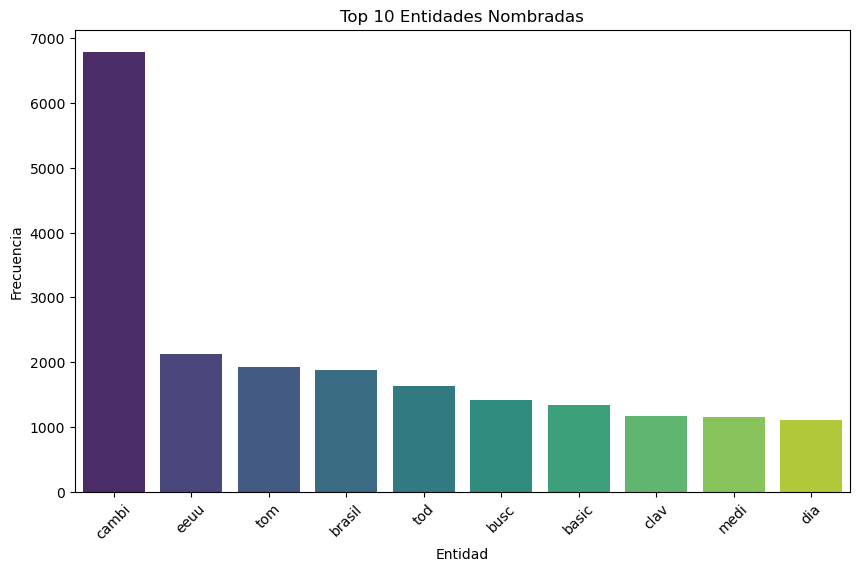

In [ ]:
all_entities = []
for entity_list in df_analyzed["named_entities"]:
    for entity, label in entity_list:
        all_entities.append(entity)

entity_counts = Counter(all_entities)
print("Top 10 Entidades Nombradas:")
for entity, count in entity_counts.most_common(10):
    print(f"{entity}: {count}")

# Visualización
top_entities = entity_counts.most_common(10)
if top_entities:
    entities_names, counts = zip(*top_entities)
    plt.figure(figsize=(10, 6))
    sns.barplot(
        x=list(entities_names), 
        y=list(counts), 
        palette='viridis'
    )
    plt.title("Top 10 Entidades Nombradas")
    plt.xlabel("Entidad")
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("No se extrajeron entidades para visualizar.")


# ADVANCED ANALYTICSC

Device set to use cpu


Performing Sentiment Analysis using BERT...

Sentiment Distribution:
sentiment
1 star     5031
2 stars     768
3 stars     583
5 stars     145
4 stars     139
Name: count, dtype: int64


c:\Users\Jesus\Desktop\Diplomado\1. Repos\npl_final_challenge\resources\advanced_text_pattern_analyzer.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='coolwarm')


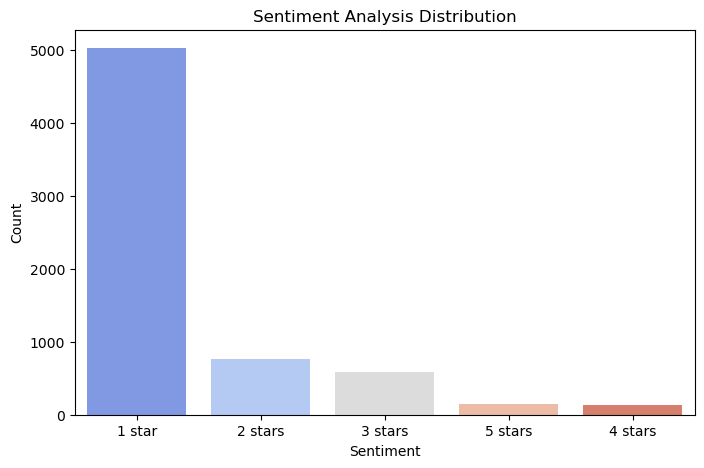

In [33]:
from resources.advanced_text_pattern_analyzer import AdvancedTextAnalyzer


analyzer = AdvancedTextAnalyzer(df_processed, 'final_text')
analyzer.run_full_advanced_analysis()